In [1]:
import logging 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import tensorflow as tf
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


2025-03-29 04:26:57.476565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 04:26:57.656892: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 04:26:57.667670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743222417.683758   78495 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743222417.688175   78495 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-29 04:26:57.705740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
df_raw = pd.read_csv('../data/Maternal Health Risk Data Set.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [3]:
df_raw.sample(10, random_state=2025)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
109,32,140,100,7.9,98.0,78,high risk
185,55,100,65,6.1,98.0,66,low risk
402,35,100,70,7.8,98.0,60,low risk
800,32,120,80,6.8,98.0,70,mid risk
684,32,140,100,6.9,98.0,78,high risk
555,50,130,100,16.0,98.0,75,mid risk
34,21,75,50,6.1,98.0,70,low risk
689,40,160,100,19.0,98.0,77,high risk
172,20,100,90,7.1,98.0,88,low risk
528,15,78,49,7.5,98.0,77,low risk


In [5]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['risklevel'] = df_baking['risklevel'].map({'low risk': 1, 'mid risk': 2, 'high risk': 3})
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1014 non-null   int64  
 1   systolicbp   1014 non-null   int64  
 2   diastolicbp  1014 non-null   int64  
 3   bs           1014 non-null   float64
 4   bodytemp     1014 non-null   float64
 5   heartrate    1014 non-null   int64  
 6   risklevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [6]:
df_train, df_test = train_test_split(df,test_size=0.15,random_state=2025)
df_train,df_val = train_test_split(df_train,test_size=0.15, random_state=2025)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          731 non-null    int64  
 1   systolicbp   731 non-null    int64  
 2   diastolicbp  731 non-null    int64  
 3   bs           731 non-null    float64
 4   bodytemp     731 non-null    float64
 5   heartrate    731 non-null    int64  
 6   risklevel    731 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 40.1 KB


In [7]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,731.0,30.020520,13.533150,10.0,19.0,26.0,40.0,66.0
systolicbp,731.0,113.387141,18.512026,70.0,97.0,120.0,120.0,160.0
diastolicbp,731.0,76.734610,14.048181,49.0,65.0,80.0,90.0,100.0
bs,731.0,8.784583,3.383611,6.0,6.9,7.5,8.0,19.0
bodytemp,731.0,98.698222,1.414847,98.0,98.0,98.0,98.0,103.0
heartrate,731.0,74.421341,8.375128,7.0,70.0,76.0,80.0,90.0
risklevel,731.0,1.896033,0.816020,1.0,1.0,2.0,3.0,3.0


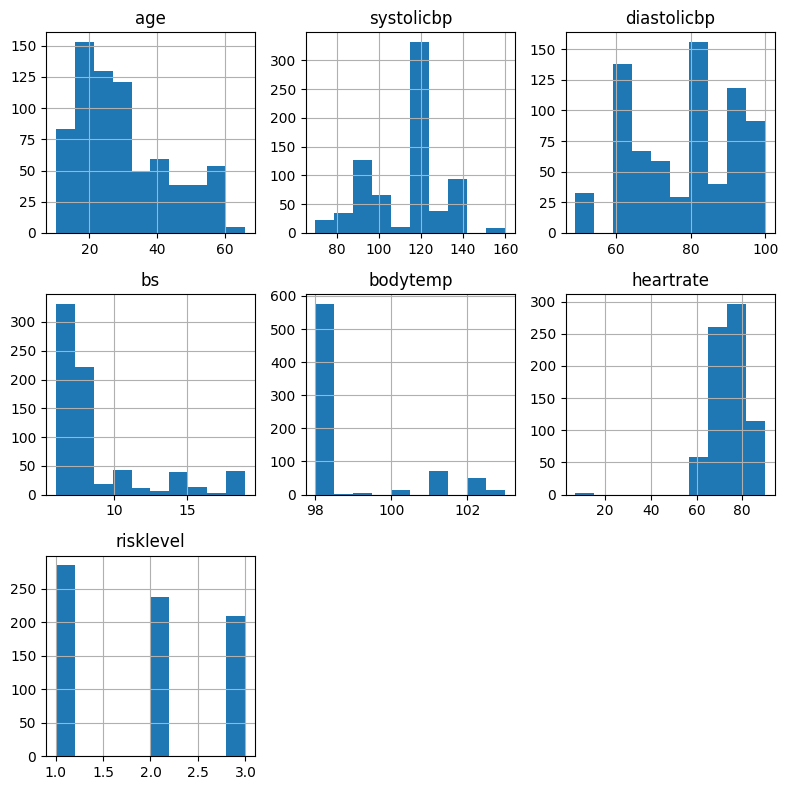

In [8]:
df_train.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

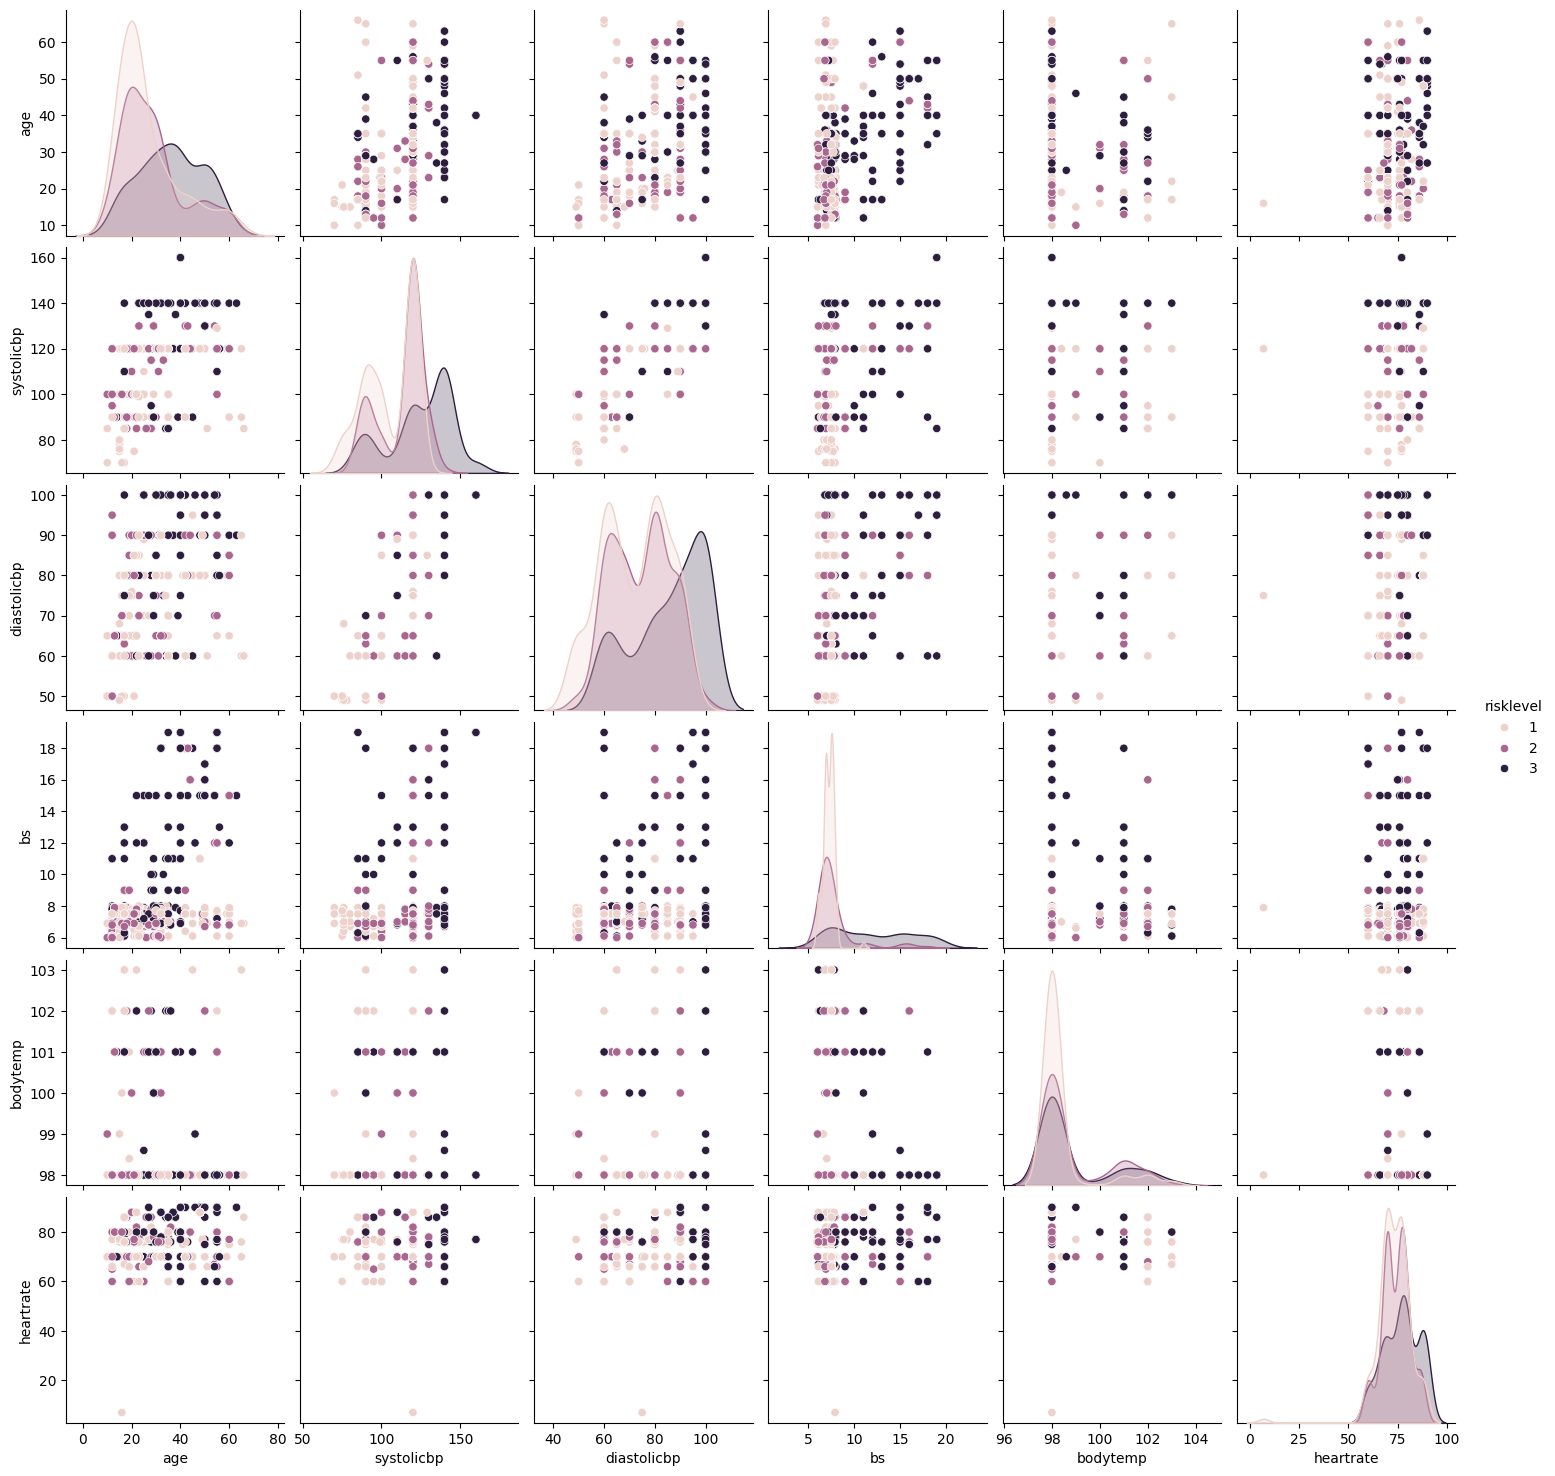

In [9]:
sns.pairplot(df_train, hue="risklevel")
plt.show()

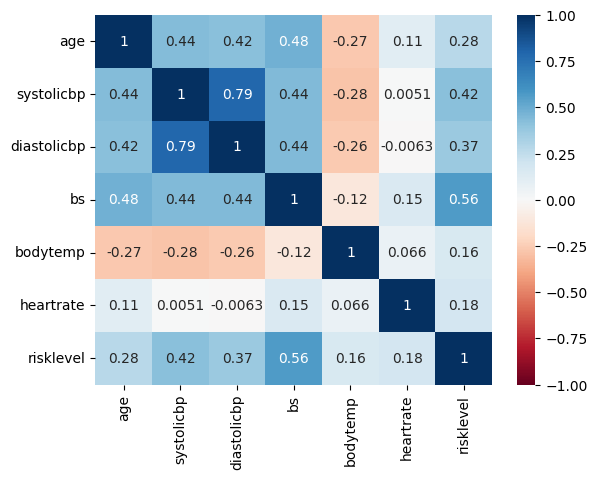

In [10]:
sns.heatmap(data=df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [11]:
X_train = df_train[['age', 'systolicbp', 'diastolicbp', 'bs', 'bodytemp', 'heartrate']].copy()
y_train = df_train['risklevel'].copy()

X_val = df_val[['age', 'systolicbp', 'diastolicbp', 'bs', 'bodytemp', 'heartrate']].copy()
y_val = df_val['risklevel'].copy()

X_test = df_test[['age', 'systolicbp', 'diastolicbp', 'bs', 'bodytemp', 'heartrate']].copy()
y_test = df_test['risklevel'].copy()

# Apply scaling
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)  # Scale validation set using the same scaler
X_test_sc = scaler.transform(X_test)


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(X_train_sc.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])




/workspaces/Test-3-28-25/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [40]:
history = model.fit(
    X_train_sc,
    y_train,  # Use the encoded target labels
    epochs=50,
    validation_data=(X_val_sc, y_val),  # Use the encoded validation labels
    batch_size=8
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1840 - mse: 5.1840 - val_loss: 3.2891 - val_mse: 3.2891
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0045 - mse: 3.0045 - val_loss: 1.7364 - val_mse: 1.7364
Epoch 3/50
34/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8160 - mse: 1.8160 

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5171 - mse: 1.5171 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7458 - mse: 0.7458 - val_loss: 0.5554 - val_mse: 0.5554
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5190 - mse: 0.5190 - val_loss: 0.5179 - val_mse: 0.5179
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5090 - mse: 0.5090 - val_loss: 0.5043 - val_mse: 0.5043
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4993 - mse: 0.4993 - val_loss: 0.4869 - val_mse: 0.4869
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4819 - mse: 0.4819 - val_loss: 0.4628 - val_mse: 0.4628
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4759 - mse: 0.4759 - val_loss: 0.4416 - val_mse: 0.4416
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4237 - mse: 0.4237 - val_loss: 0.4231 - val_mse: 0.4231
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4421 - mse: 0.4421 - 

Liner Regression Benchmark

- MSE: 114.69591216414433
- RMSE: 10.709617741270897
- R2: 0.5905426768547533

In [41]:
metrics = model.evaluate(X_test_sc,y_test)
metrics


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3372 - mse: 0.3372 


[0.34404903650283813, 0.34404903650283813]

In [42]:
y_hat = model.predict(X_test_sc)
y_hat = y_hat.reshape(-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [43]:
print(f'MSE: {mean_squared_error(y_test, y_hat)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_hat))}')
print(f'R2: {r2_score(y_test, y_hat)}')

MSE: 0.3440490961074829
RMSE: 0.5865569845355888
R2: 0.38623344898223877


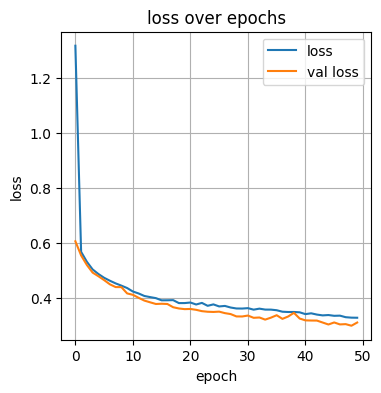

In [26]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('loss over epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

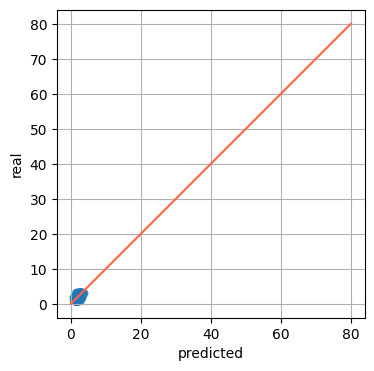

In [27]:
plt.figure(figsize=(4,4))
plt.scatter(x=y_hat,y=y_test,alpha=0.5)
plt.plot([0,80],[0,80],color='tomato')
plt.xlabel('predicted')
plt.ylabel('real')
plt.grid(True)
plt.axis('square')
plt.show()